<a href="https://colab.research.google.com/github/AbheetSethi/Algorithms/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt

# **Preprocessing and EDA**

In [ ]:
!wget -O recruitment.csv "https://drive.google.com/uc?export=download&id=1KI_m-XmcU-jL8zNHyNLDM49L0A3C7MIn"
df = pd.read_csv('recruitment.csv')


--2024-10-08 20:06:46--  https://drive.google.com/uc?export=download&id=1KI_m-XmcU-jL8zNHyNLDM49L0A3C7MIn
Resolving drive.google.com (drive.google.com)... 74.125.139.101, 74.125.139.139, 74.125.139.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.139.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1KI_m-XmcU-jL8zNHyNLDM49L0A3C7MIn&export=download [following]
--2024-10-08 20:06:47--  https://drive.usercontent.google.com/download?id=1KI_m-XmcU-jL8zNHyNLDM49L0A3C7MIn&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63964 (62K) [application/octet-stream]
Saving to: ‘recruitment.csv’

recruitment.csv     100%[===================>]  62.46K  --.-KB/s

In [ ]:
X = df.drop(labels=['HiringDecision'],axis=1)
y= df['HiringDecision']

In [ ]:
X.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,26,1,2,0,3,26.783828,48,78,91,1
1,39,1,4,12,3,25.862694,35,68,80,2
2,48,0,2,3,2,9.920805,20,67,13,2
3,34,1,2,5,2,6.407751,36,27,70,3
4,30,0,1,6,1,43.105343,23,52,85,2


In [ ]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [ ]:
print("\nShape of DataFrame: ", df.shape)
print("\nColumns in DataFrame: ", df.columns.to_list())
print("\nData types of columns:\n", df.dtypes)

print("\nNumber of unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

print("\nNumber of null values in each column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:\n ", df.duplicated().sum())
print("\nDescriptive statistics of DataFrame\n", df.describe().transpose())


Shape of DataFrame:  (1500, 11)

Columns in DataFrame:  ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy', 'HiringDecision']

Data types of columns:
 Age                      int64
Gender                   int64
EducationLevel           int64
ExperienceYears          int64
PreviousCompanies        int64
DistanceFromCompany    float64
InterviewScore           int64
SkillScore               int64
PersonalityScore         int64
RecruitmentStrategy      int64
HiringDecision           int64
dtype: object

Number of unique values in each column:
Age: 31
Gender: 2
EducationLevel: 4
ExperienceYears: 16
PreviousCompanies: 5
DistanceFromCompany: 1500
InterviewScore: 101
SkillScore: 101
PersonalityScore: 101
RecruitmentStrategy: 3
HiringDecision: 2

Number of null values in each column:
 Age                    0
Gender                 0
EducationLevel         0
ExperienceYea

Correlation Matrix:
Age: {'Age': 0.9993333333333341, 'Gender': 0.01127853620224295, 'EducationLevel': 0.032587772783488504, 'ExperienceYears': 0.024763618774505308, 'PreviousCompanies': -0.03255794438834307, 'DistanceFromCompany': -0.021017443385397683, 'InterviewScore': -0.025561595436791457, 'SkillScore': -0.008062988782933815, 'PersonalityScore': 0.03770197424172431, 'RecruitmentStrategy': 0.018052008643863846, 'HiringDecision': 0.0018485851664770264}
Gender: {'Age': 0.01127853620224295, 'Gender': 0.9993333333333291, 'EducationLevel': 0.009669694627828001, 'ExperienceYears': -0.028483166267516926, 'PreviousCompanies': -0.06187372843428831, 'DistanceFromCompany': 0.003819913923512851, 'InterviewScore': -0.020873171578855765, 'SkillScore': 0.012324966421909745, 'PersonalityScore': 0.02371306425120289, 'RecruitmentStrategy': -0.023736913282084233, 'HiringDecision': -0.002247470073917839}
EducationLevel: {'Age': 0.032587772783488504, 'Gender': 0.009669694627828001, 'EducationLevel': 0.9

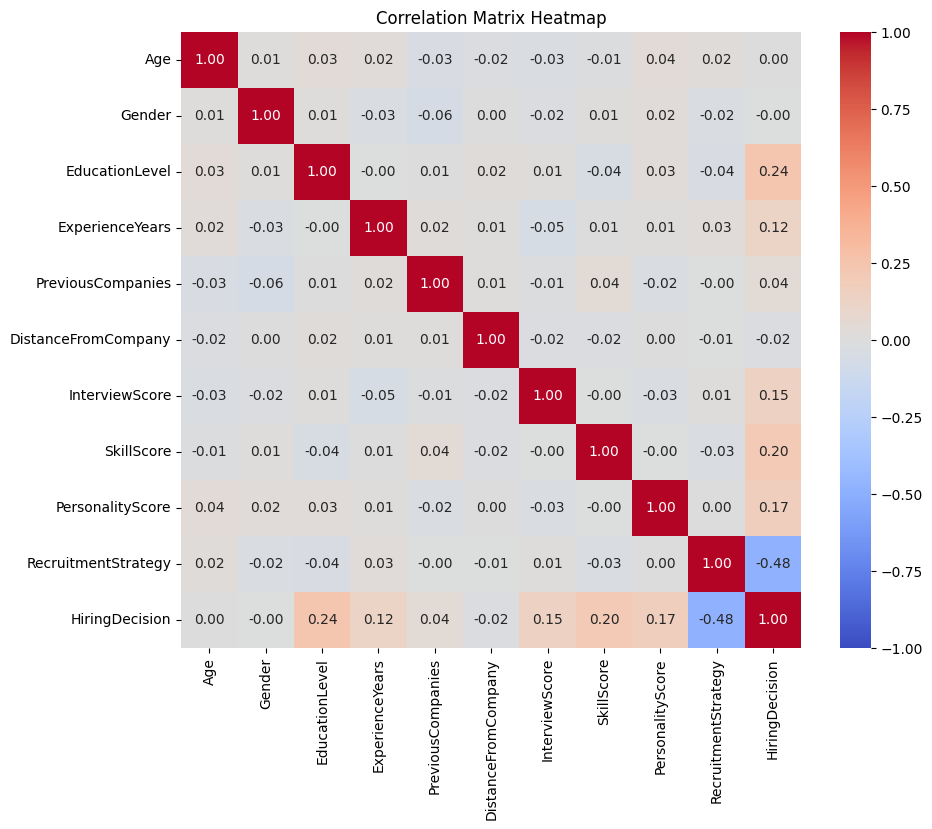

In [ ]:
class DataFrame:
    def __init__(self, file_path):
        # Load the CSV file into a Pandas DataFrame
        self.df = pd.read_csv(file_path)

    def calculate_correlation_matrix(self):
        # Get numerical columns only
        numerical_columns = self.df.select_dtypes(include=['float64', 'int64']).columns
        num_cols = len(numerical_columns)

        # Create an empty correlation matrix as a dictionary
        corr_matrix = {col: {col2: 0 for col2 in numerical_columns} for col in numerical_columns}

        for i in range(num_cols):
            for j in range(i, num_cols):
                col1 = numerical_columns[i]
                col2 = numerical_columns[j]

                # Calculate mean for both columns
                mean1 = self.df[col1].mean()
                mean2 = self.df[col2].mean()

                # Calculate covariance
                covariance = ((self.df[col1] - mean1) * (self.df[col2] - mean2)).mean()

                # Calculate standard deviations
                std_dev1 = self.df[col1].std()
                std_dev2 = self.df[col2].std()

                # Calculate correlation
                correlation = covariance / (std_dev1 * std_dev2)

                # Store the correlation in the matrix
                corr_matrix[col1][col2] = correlation
                corr_matrix[col2][col1] = correlation  # Since correlation matrix is symmetric

        return corr_matrix

    def display_correlation_matrix(self):
        # Calculate the correlation matrix
        corr_matrix = self.calculate_correlation_matrix()

        # Display the correlation matrix
        print("Correlation Matrix:")
        for col1, row in corr_matrix.items():
            print(f"{col1}: {row}")

    def display_heatmap(self):
        # Use Pandas built-in correlation method for the heatmap
        corr_matrix = self.df.corr()

        # Plot the heatmap using Seaborn
        plt.figure(figsize=(10, 8))
        snb.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)
        plt.title('Correlation Matrix Heatmap')
        plt.show()

# Step 1: Instantiate the DataFrame object using the downloaded CSV
file_path = 'recruitment.csv'
df = DataFrame(file_path)

# Step 2: Display the correlation matrix for the recruitment dataset
df.display_correlation_matrix()

# Step 3: Display the correlation matrix heatmap
df.display_heatmap()



Features with high correlation score with hiring desicion
1.   Education Level
2.   Experience Years
3.   Interview Score
4.   Skill Score   
5.   Personality Score   
6.   Recruitment Strategy

Features with 0 or low correlation score with hiring desicion
1. Age
2. Gender
3. Distance from company

In [ ]:
y.value_counts()

,count
HiringDecision,
0,1035
1,465


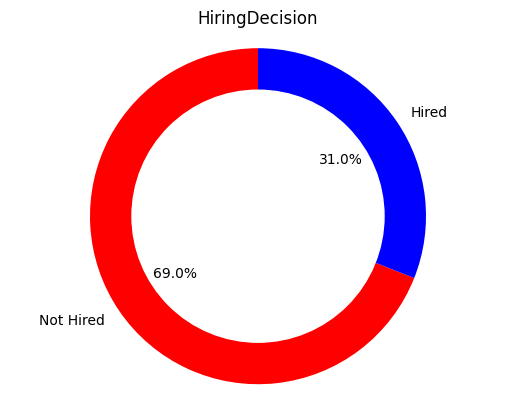

In [ ]:
df = pd.read_csv('recruitment.csv')
hiring_counts = y.value_counts()
labels = ['Not Hired', 'Hired']
colors = ['red', 'blue']

fig, ax = plt.subplots()
ax.pie(hiring_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

circle = plt.Circle((0, 0), 0.75, color='white')
ax.add_artist(circle)

plt.title('HiringDecision')
ax.axis('equal')

plt.show()

A bit of Class Imbalance is present in the Predictive Column.

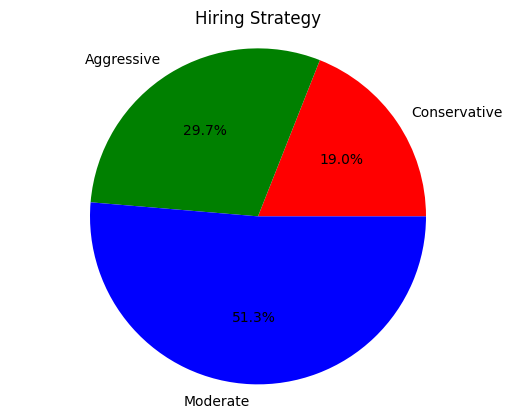

In [ ]:
RS_Counts=df['RecruitmentStrategy'].value_counts().sort_values()
labels={1: 'Aggressive',
    2: 'Moderate',
    3: 'Conservative'}
colors=['red','green','blue']
plt.pie(x=RS_Counts,labels = [labels[i] for i in RS_Counts.index],autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.title('Hiring Strategy')
plt.show()

Moderate Hiring is happening more (Majority).

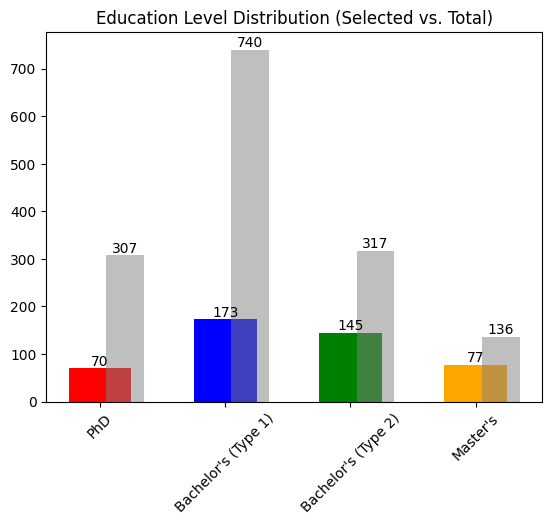

In [ ]:
df = pd.read_csv('recruitment.csv')
selected_df = df[df['HiringDecision'] == 1]

gen_val_selected = selected_df['EducationLevel'].value_counts()

total_df = df['EducationLevel'].value_counts()

fig, ax = plt.subplots()
colors = ['blue', 'green', 'orange', 'red']

bars_selected = ax.bar(gen_val_selected.index, gen_val_selected.values, color=colors, width=0.5, label='Selected')

for bar in bars_selected:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.0f}', ha='center', va='bottom')

if total_df is not None:
    offset = 0.2
    bars_total = ax.bar(total_df.index + offset, total_df.values, color='gray', alpha=0.5, width=0.3, label='Total')
    for bar in bars_total:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.0f}', ha='center', va='bottom')

edu_dict = {1: "Bachelor's (Type 1)", 2: "Bachelor's (Type 2)", 3: "Master's", 4: "PhD"}
plt.xticks(ticks=gen_val_selected.index, labels=list(edu_dict.values()), rotation=45)
plt.title('Education Level Distribution (Selected vs. Total)')
plt.show()

Above plot shows the count of selected candidates' educational levels

# **MODEL TRAINING**

In [ ]:
# Implement Logistic Regression Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_weights(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def compute_cost(y, W, X, b):
    m = len(y)
    linear_model = np.dot(X, W) + b
    cost = (1 / m) * np.sum(np.log(1 + np.exp(-y * linear_model)))
    return cost

def compute_gradients(X, y, W, b):
    m = X.shape[0]
    linear_model = np.dot(X, W) + b
    z = -y * linear_model
    sigmoid_z = sigmoid(z)
    dw = -np.dot(X.T, y * sigmoid_z) / m  # Average gradient
    db = -np.mean(y * sigmoid_z)  # Average gradient for bias
    return dw, db

def optimize(X, y, weights, bias, learning_rate, num_iterations):
    costs = []
    for i in range(num_iterations):
        z = np.dot(X, weights) + bias
        cost = compute_cost(y, weights, X, bias)
        costs.append(cost)
        dw, db = compute_gradients(X, y, weights, bias)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        if i % 10000 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return weights, bias, costs

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    predictions = np.where(y_pred >= 0.5, 1, 0)  # Change -1 to 0 for binary classification
    return predictions


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Functions (defined previously)

# Initialize Weights
w, b = initialize_weights(X_train.shape[1])

# Adjusting y_test
y_test[y_test == 0] = -1

# Optimize Weights and Bias
weights, bias, costs = optimize(X_train, y_train, w, b, 0.001, 10000)

# Make Predictions
y_pred = predict(X_test, weights, bias)

# Calculate Matches and Mismatches
matches = np.sum(y_test == y_pred)
mismatches = np.sum(y_test != y_pred)

# Print Accuracy
print(f"Accuracy: {matches / (matches + mismatches):.4f}")


Iteration 0: Cost = 0.6931
Accuracy: 0.2800
